Outdated notebook with old, unused experiment plots

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('darkgrid')
%matplotlib inline

In [11]:
multitask_dir = '../experiment_output/multitask_base_experiment/evaluation/'
multif0_dir = '../experiment_output/multitask_singletask_mf0/evaluation/'
melody_dir = '../experiment_output/multitask_singletask_mel/evaluation/'
bass_dir = '../experiment_output/multitask_singletask_bass/evaluation/'
vocal_dir = '../experiment_output/multitask_singletask_vocal/evaluation/'

multitask_nosynth_dir = '../experiment_output/multitask_nosynth/evaluation/'
multitask_freq_dir = '../experiment_output/multitask_freq_feature/evaluation/'
multitask_freq_nosynth_dir = '../experiment_output/multitask_freq_nosynthdata/evaluation/'
melody_freq_dir = '../experiment_output/multitask_singletask_mel_freq/evaluation/'
bass_freq_dir = '../experiment_output/multitask_singletask_bass_freq/evaluation/'
vocal_freq_dir = '../experiment_output/multitask_singletask_vocal_freq/evaluation/'

In [26]:
def get_dfbox(dataset_scores, metrics, folder_list):
    df_list = []
    for folder in folder_list:
        df = pd.DataFrame.from_csv(os.path.join(folder, dataset_scores))
        df_list.append(df)
#         print(folder)
#         print(df.describe())
#         print("")
    
    boxdata = []
    for metric in metrics:
        boxdata.extend([df[metric] for df in df_list])

    dfbox = pd.DataFrame(np.array(boxdata).T)
    return dfbox


def add_plot(subplot_tuple, metrics, exper_names, dfbox, title, show_yaxis=True, legend_loc=None, xlim=None):
    plt.subplot(subplot_tuple)
    plt.title(title, weight='bold')
    n_metrics = len(metrics)
    n_exper = len(exper_names)
    positions = []
    k = 1
    for i in range(n_metrics):
        for j in range(n_exper):
            positions.append(k)
            k = k + 1
        k = k + 1

    y_pos = []
    for i in np.arange(0, len(positions), n_exper):
        y_pos.append(np.mean(positions[i:i + n_exper]))

    current_palette = sns.color_palette('deep', n_exper) #["#E1D89F", "#8EA8BD", "#CF6766"]
    colors = current_palette*n_metrics

    box = plt.boxplot(
        dfbox.values, widths=0.8, positions=positions,
        patch_artist=True, showmeans=True,
        medianprops={'color': 'k'},
        meanprops=dict(marker='D', markeredgecolor='black',
            markerfacecolor='k'),
        vert=False
    )
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.xlabel('Score')
    if show_yaxis:
        plt.yticks(y_pos, metrics, rotation='horizontal', weight='bold')
    else:
        plt.yticks(y_pos, ['']*len(metrics), rotation='horizontal')

    if xlim is not None:
        plt.xlim(xlim)
        
    if legend_loc is not None:
        h_list = []
        for i, name in enumerate(exper_names):
            h, = plt.plot([1, 1], 's', color=colors[i], markersize=10)
            h_list.append(h)
            
        lgd = plt.legend(tuple(h_list), tuple(exper_names), ncol=1, loc=legend_loc)

        for h in h_list:
            h.set_visible(False)


# Multitask vs Single Task

# Multif0

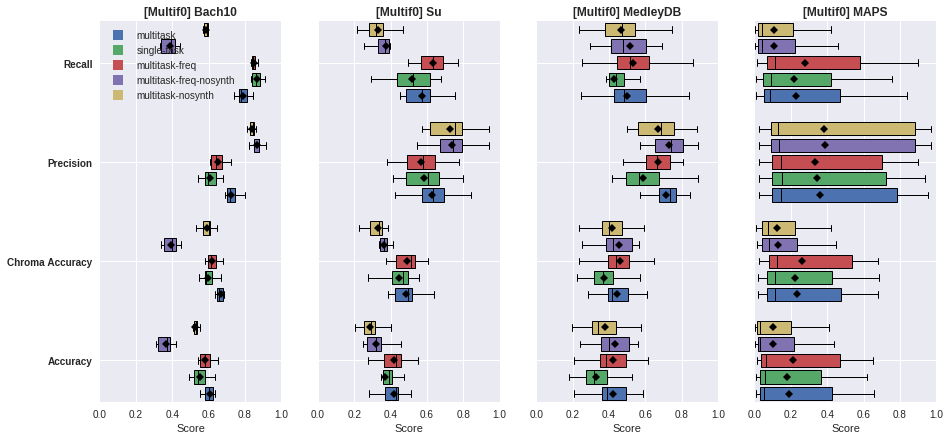

In [27]:
metrics = ['Accuracy', 'Chroma Accuracy', 'Precision', 'Recall']
exper_names = ['multitask', 'single-task', 'multitask-freq', 'multitask-freq-nosynth', 'multitask-nosynth']
exper_folders = [multitask_dir, multif0_dir, multitask_freq_dir, multitask_freq_nosynth_dir, multitask_nosynth_dir]

df_bach10 = get_dfbox('bach10_scores.csv', metrics, exper_folders)
df_su = get_dfbox('su_scores.csv', metrics, exper_folders)
df_mdbmf0 = get_dfbox('mdb_mf0_scores.csv', metrics, exper_folders)
df_maps = get_dfbox('maps_scores.csv', metrics, exper_folders)

fig = plt.figure(figsize=(15, 7))

add_plot(141, metrics, exper_names, df_bach10, '[Multif0] Bach10', xlim=[0.0, 1.0], legend_loc=0)
add_plot(142, metrics, exper_names, df_su, '[Multif0] Su', show_yaxis=False, xlim=[0.0, 1.0])
add_plot(143, metrics, exper_names, df_mdbmf0, '[Multif0] MedleyDB', xlim=[0.0, 1.0], show_yaxis=False)
add_plot(144, metrics, exper_names, df_maps, '[Multif0] MAPS', xlim=[0.0, 1.0], show_yaxis=False)

# Melody

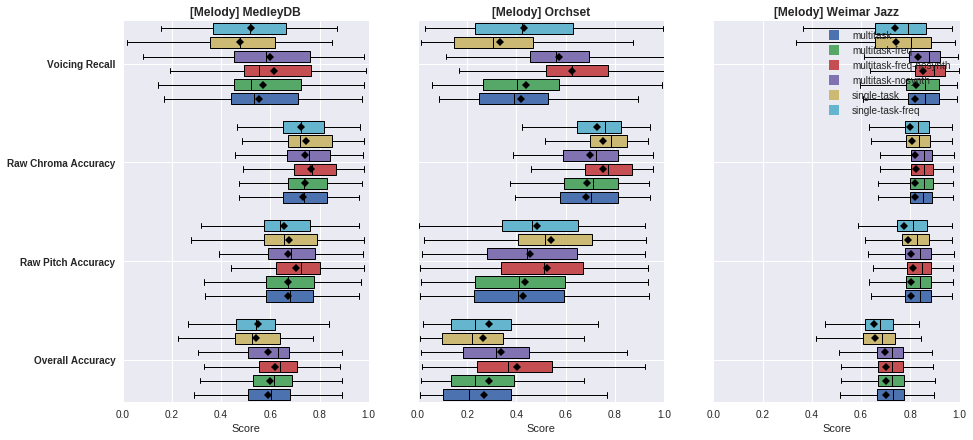

In [30]:
metrics = ['Overall Accuracy', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy', 'Voicing Recall']#, 'Voicing False Alarm']
exper_names = ['multitask', 'multitask-freq', 'multitask-freq-nosynth', 'multitask-nosynth', 'single-task', 'single-task-freq']
exper_folders = [multitask_dir, multitask_freq_dir, multitask_freq_nosynth_dir, multitask_nosynth_dir, melody_dir, melody_freq_dir]

df_mdbmel = get_dfbox('mdb_mel_scores.csv', metrics, exper_folders)
df_orchset = get_dfbox('orchset_scores.csv', metrics, exper_folders)
df_wjmel = get_dfbox('wj_mel_scores.csv', metrics, exper_folders)

fig = plt.figure(figsize=(15, 7))

add_plot(131, metrics, exper_names, df_mdbmel, '[Melody] MedleyDB', xlim=[0.0, 1.0])
add_plot(132, metrics, exper_names, df_orchset, '[Melody] Orchset', show_yaxis=False, xlim=[0.0, 1.0])
add_plot(133, metrics, exper_names, df_wjmel, '[Melody] Weimar Jazz', xlim=[0.0, 1.0], show_yaxis=False, legend_loc=0)

# Bass + Vocal

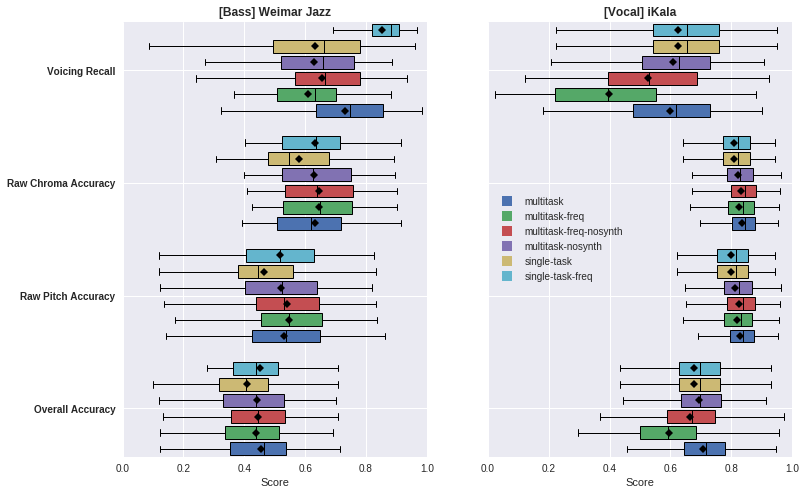

In [15]:
metrics = ['Overall Accuracy', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy', 'Voicing Recall']
exper_names = ['multitask', 'multitask-freq', 'multitask-freq-nosynth', 'multitask-nosynth', 'single-task', 'single-task-freq']
exper_folders = [multitask_dir, multitask_freq_dir, multitask_freq_nosynth_dir, multitask_nosynth_dir, bass_dir, bass_freq_dir]

df_wjbass = get_dfbox('wj_bass_scores.csv', metrics, exper_folders)

exper_folders = [multitask_dir, multitask_freq_dir, multitask_freq_nosynth_dir, multitask_nosynth_dir, vocal_dir, vocal_dir]

df_ikala = get_dfbox('ikala_scores.csv', metrics, exper_folders)

fig = plt.figure(figsize=(12, 8))

add_plot(121, metrics, exper_names, df_wjbass, '[Bass] Weimar Jazz', xlim=[0.0, 1.0])
add_plot(122, metrics, exper_names, df_ikala, '[Vocal] iKala', xlim=[0.0, 1.0], legend_loc=0, show_yaxis=False)

# Vocal

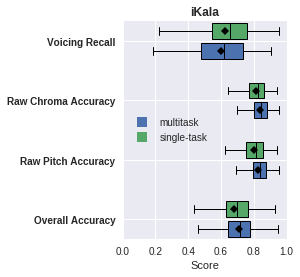

In [13]:
# metrics = ['Overall Accuracy', 'Raw Pitch Accuracy', 'Raw Chroma Accuracy', 'Voicing Recall']#, 'Voicing False Alarm']
# exper_names = ['multitask', 'single-task', '']
# exper_folders = [multitask_dir, vocal_dir]

# df_ikala = get_dfbox('ikala_scores.csv', metrics, exper_folders)

# fig = plt.figure(figsize=(10, 4))

# add_plot(131, metrics, exper_names, df_ikala, 'iKala', xlim=[0.0, 1.0], legend_loc=0)

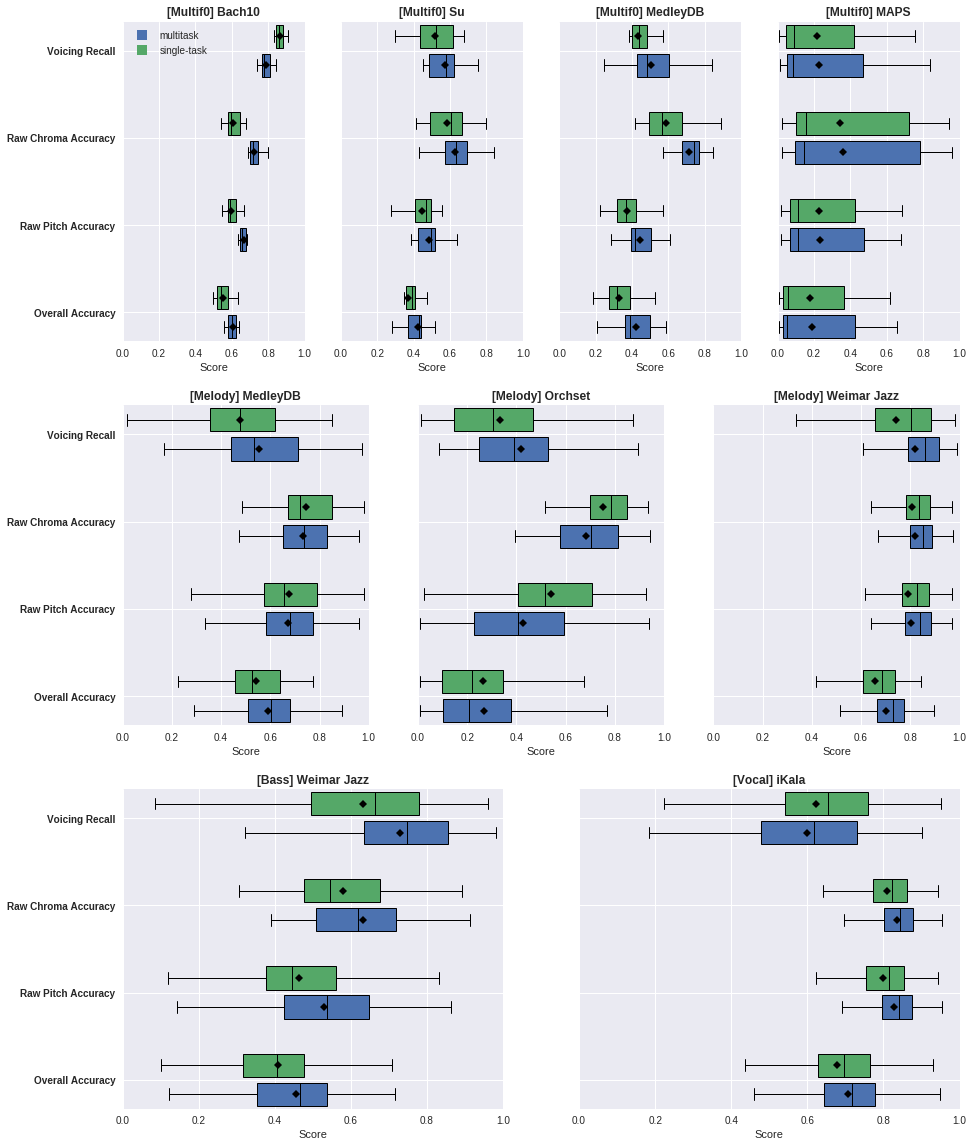

In [88]:
plt.figure(figsize=(15, 20))

add_plot(341, metrics, exper_names, df_bach10, '[Multif0] Bach10', xlim=[0.0, 1.0], legend_loc=2)
add_plot(342, metrics, exper_names, df_su, '[Multif0] Su', show_yaxis=False, xlim=[0.0, 1.0])
add_plot(343, metrics, exper_names, df_mdbmf0, '[Multif0] MedleyDB', xlim=[0.0, 1.0], show_yaxis=False)
add_plot(344, metrics, exper_names, df_maps, '[Multif0] MAPS', xlim=[0.0, 1.0], show_yaxis=False)

add_plot(334, metrics, exper_names, df_mdbmel, '[Melody] MedleyDB', xlim=[0.0, 1.0])
add_plot(335, metrics, exper_names, df_orchset, '[Melody] Orchset', show_yaxis=False, xlim=[0.0, 1.0])
add_plot(336, metrics, exper_names, df_wjmel, '[Melody] Weimar Jazz', xlim=[0.0, 1.0], show_yaxis=False)

add_plot(325, metrics, exper_names, df_wjbass, '[Bass] Weimar Jazz', xlim=[0.0, 1.0])
add_plot(326, metrics, exper_names, df_ikala, '[Vocal] iKala', xlim=[0.0, 1.0], show_yaxis=False)

plt.savefig('../paper-figs/multitask_single_vs_multi.pdf', format='pdf', bbox_inches='tight')

ValueError: List of boxplot statistics and `positions` values must have same the length

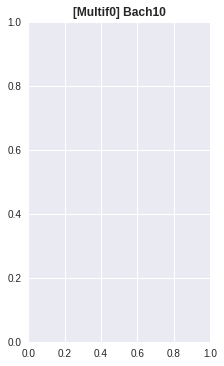

In [16]:
plt.figure(figsize=(15, 20))

add_plot(341, metrics, exper_names, df_bach10, '[Multif0] Bach10', xlim=[0.0, 1.0], legend_loc=2)
add_plot(342, metrics, exper_names, df_su, '[Multif0] Su', show_yaxis=False, xlim=[0.0, 1.0])
add_plot(343, metrics, exper_names, df_mdbmf0, '[Multif0] MedleyDB', xlim=[0.0, 1.0], show_yaxis=False)
add_plot(344, metrics, exper_names, df_maps, '[Multif0] MAPS', xlim=[0.0, 1.0], show_yaxis=False)

add_plot(334, metrics, exper_names, df_mdbmel, '[Melody] MedleyDB', xlim=[0.0, 1.0])
add_plot(335, metrics, exper_names, df_orchset, '[Melody] Orchset', show_yaxis=False, xlim=[0.0, 1.0])
add_plot(336, metrics, exper_names, df_wjmel, '[Melody] Weimar Jazz', xlim=[0.0, 1.0], show_yaxis=False)

add_plot(325, metrics, exper_names, df_wjbass, '[Bass] Weimar Jazz', xlim=[0.0, 1.0])
add_plot(326, metrics, exper_names, df_ikala, '[Vocal] iKala', xlim=[0.0, 1.0], show_yaxis=False)

# plt.savefig('../paper-figs/multitask_single_vs_multi.pdf', format='pdf', bbox_inches='tight')